In [6]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, MaxPooling2D, Flatten,Conv2D

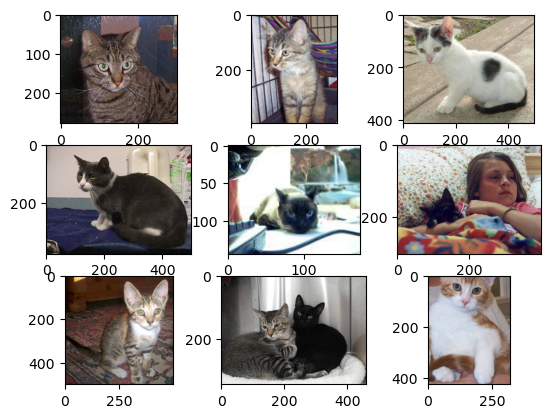

In [36]:
# print some images

import matplotlib.pyplot as plt

from matplotlib.image import imread

 

Folder='/Users/shreyavidyadhar/Downloads/Lesson end project/dataset/training_set/cats/'
 

for i in range(9):

    plt.subplot(330+1+i)

    filename=Folder+'cat.'+str(i+1)+'.jpg'

    image=imread(filename)

    plt.imshow(image)

plt.show()
  
    

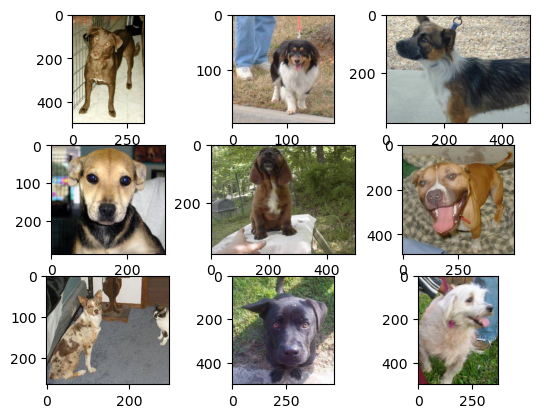

In [38]:
import matplotlib.pyplot as plt

from matplotlib.image import imread

 

Folder='/Users/shreyavidyadhar/Downloads/Lesson end project/dataset/training_set/dogs/'
 

for i in range(9):

    plt.subplot(330+1+i)

    filename=Folder+'dog.'+str(i+1)+'.jpg'

    image=imread(filename)

    plt.imshow(image)

plt.show()
  
    

# data augmentation 
# image data generator 


In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [45]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [47]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [51]:
from tensorflow import expand_dims
from tensorflow.keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator 
from matplotlib import pyplot 

In [127]:
import PIL
from PIL import Image

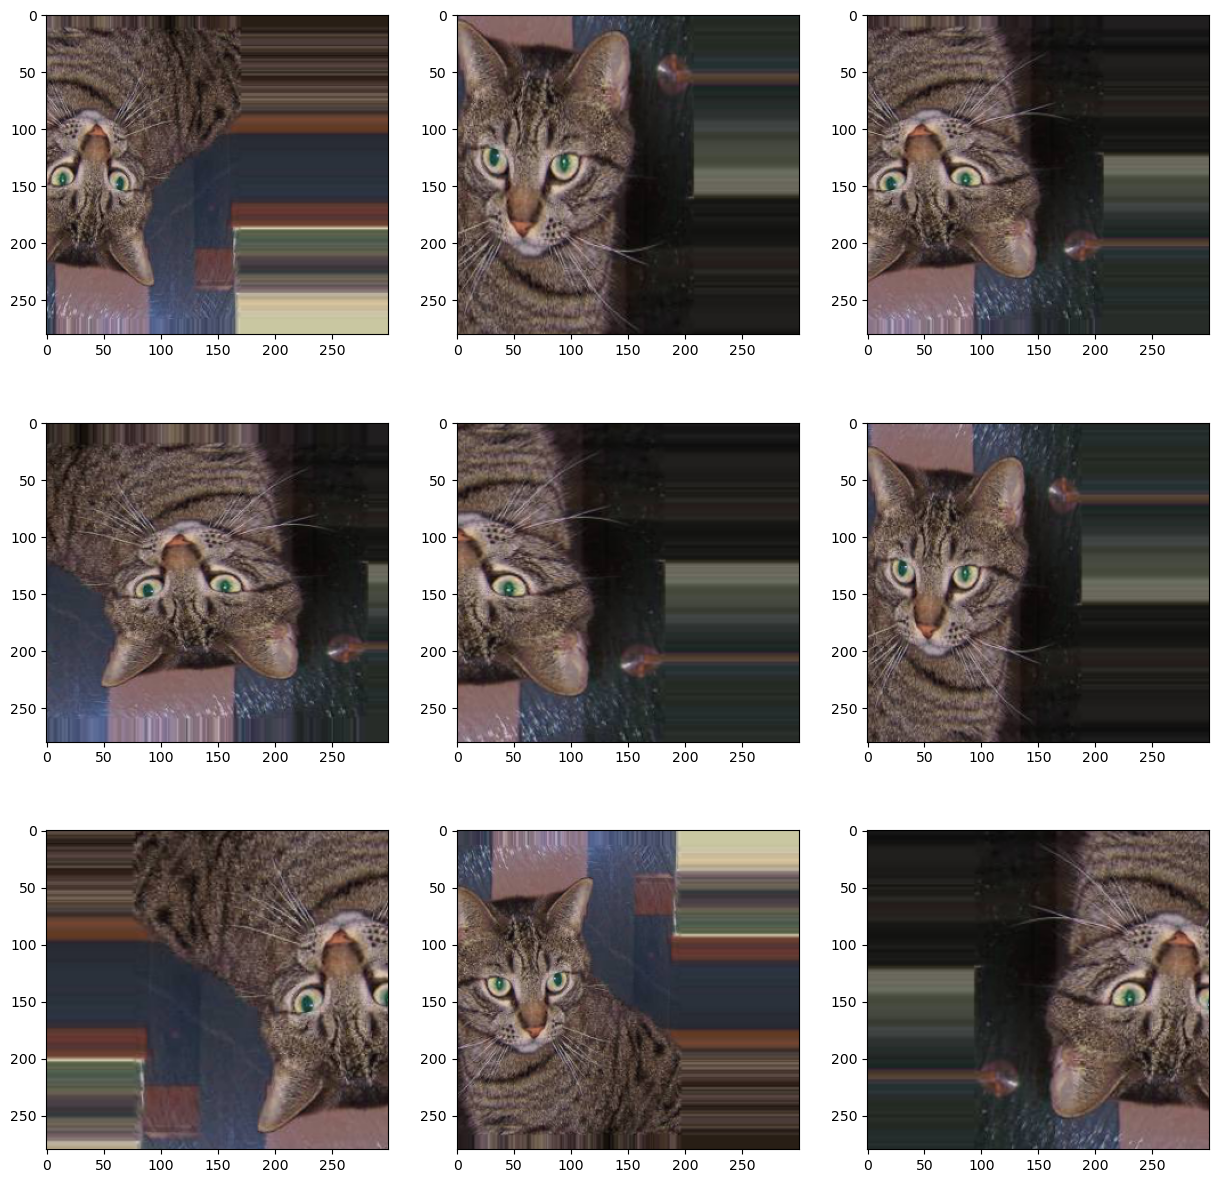

In [82]:
# images will be generated at training time 
# example of data augmentation
plt.figure(figsize=(15,15))
# load the image 
img=load_img('/Users/shreyavidyadhar/Downloads/Lesson end project/dataset/training_set/cats/cat.1.jpg')
# convert into numpy array 
data=img_to_array(img)
# expand dimensions
samples=expand_dims(data,0)
datagen=ImageDataGenerator(shear_range=.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                          vertical_flip=True,
                          height_shift_range=0.5)

# prepare the iterator 
it=datagen.flow(samples,batch_size=1)
#generate the sample images
for i in range(9):
    plt.subplot(330+1+i)
    batch=next(it)
    image=batch[0].astype('uint8')
    plt.imshow(image)

plt.show()
                           


In [88]:
# create train set and test set 
train_set=train_datagen.flow_from_directory('/Users/shreyavidyadhar/Downloads/Lesson end project/dataset/training_set/',
                                           target_size=(64,64),
                                           batch_size=32,
                                           class_mode='binary')

Found 8000 images belonging to 2 classes.


In [94]:
test_set=test_datagen.flow_from_directory('/Users/shreyavidyadhar/Downloads/Lesson end project/dataset/test_set/',
                                          target_size=(64,64),
                                           batch_size=32,
                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [98]:
train_set.class_indices

{'cats': 0, 'dogs': 1}

In [100]:
train_set.directory

'/Users/shreyavidyadhar/Downloads/Lesson end project/dataset/training_set/'

In [106]:
# create CNN architecture 
model=Sequential()
model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [108]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 823,329 (3.14 MB)

 Trainable params: 823,329 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

In [112]:
# comppile 
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             )

In [116]:
history=model.fit(train_set,validation_data=test_set,epochs=25)

model.save('CNN_model25.h5')

Epoch 1/25


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - loss: 0.6876 - val_loss: 0.6855
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 56ms/step - loss: 0.6542 - val_loss: 0.5855
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - loss: 0.5855 - val_loss: 0.5973
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 56ms/step - loss: 0.5723 - val_loss: 0.5308
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 56ms/step - loss: 0.5422 - val_loss: 0.5426
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - loss: 0.5233 - val_loss: 0.5286
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - loss: 0.5026 - val_loss: 0.5526
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - loss: 0.4821 - val_loss: 0.4922
Epoch 9/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - loss: 0.4553 - val_loss: 0.5149
Epoch 10/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - loss: 0.4420 - val_loss: 0.4923
Epoch 11/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - loss: 0.4205 - val_loss: 0.4602
Epoch 12/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 

In [118]:
#load the model 
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,469,989 (9.42 MB)

 Trainable params: 823,329 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,646,660 (6.28 MB)

# real time predicition 


In [142]:
import numpy as np
from tensorflow.keras.preprocessing  import image

In [158]:
test_image=image.load_img('/Users/shreyavidyadhar/Downloads/Lesson end project/dataset/test_set/cats/cat.4067.jpg',
                         target_size=(64,64))
test_image1=image.img_to_array(test_image)
test_image1=np.expand_dims(test_image,axis=0)

In [160]:
# print the predictions 
result=model.predict(test_image1)
print(result)
if result==1:
    prediction='Image is dog'
    print(prediction)

else:
    prediction='image is cat'
    print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.]]
image is cat


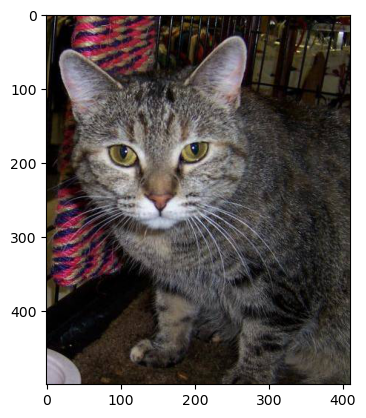

model prediction: image is cat


In [162]:
# print some images

import matplotlib.pyplot as plt

from matplotlib.image import imread

 

# load the image

image=imread('/Users/shreyavidyadhar/Downloads/Lesson end project/dataset/test_set/cats/cat.4067.jpg')
plt.imshow(image)

plt.show()

print('model prediction:',prediction)

In [170]:
# evaluate the model 
result=model.evaluate(test_set)

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.5255


In [166]:
print('test loss, test accuracy',result)

test loss, test accuracy 0.5161989331245422


In [174]:
import pandas as pd 
test_set.reset
y_pred=model.predict(test_set)

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step


In [176]:
y_pred

array([[0.00163156],
       [0.01035547],
       [0.11701909],
       ...,
       [0.9993963 ],
       [0.80064136],
       [0.9410474 ]], dtype=float32)

In [178]:
df=pd.DataFrame({'filename':test_set.filenames,

                 'predict':y_pred[:,0],

                 'Actual':test_set.classes})



In [180]:
df

,filename,predict,Actual
0,cats/cat.4001.jpg,0.001632,0
1,cats/cat.4002.jpg,0.010355,0
2,cats/cat.4003.jpg,0.117019,0
3,cats/cat.4004.jpg,0.996829,0
4,cats/cat.4005.jpg,0.039820,0
...,...,...,...
1995,dogs/dog.4996.jpg,0.953315,1
1996,dogs/dog.4997.jpg,0.852262,1
1997,dogs/dog.4998.jpg,0.999396,1
1998,dogs/dog.4999.jpg,0.800641,1


In [182]:
df['ypred']=df['predict']>0.5

df['ypred']=df['ypred'].astype('int')

df

,filename,predict,Actual,ypred
0,cats/cat.4001.jpg,0.001632,0,0
1,cats/cat.4002.jpg,0.010355,0,0
2,cats/cat.4003.jpg,0.117019,0,0
3,cats/cat.4004.jpg,0.996829,0,1
4,cats/cat.4005.jpg,0.039820,0,0
...,...,...,...,...
1995,dogs/dog.4996.jpg,0.953315,1,1
1996,dogs/dog.4997.jpg,0.852262,1,1
1997,dogs/dog.4998.jpg,0.999396,1,1
1998,dogs/dog.4999.jpg,0.800641,1,1


<Axes: >

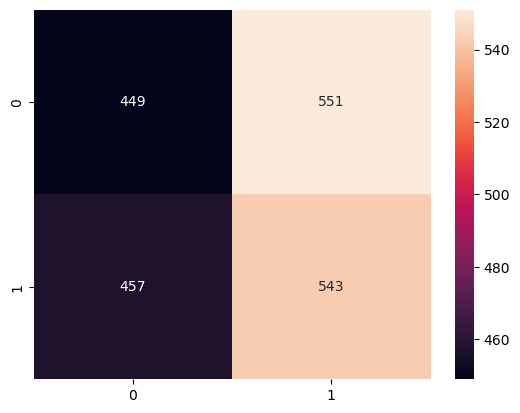

In [184]:
# prediction on test set

from sklearn.metrics import confusion_matrix

import seaborn as sns

 

cm=confusion_matrix(df.Actual,df.ypred)

sns.heatmap(cm,annot=True,fmt='d')

In [189]:
# transfer learning dont do feature extraction part 
import tensorflow as tf
Densenet_model=tf.keras.applications.DenseNet121(
    include_top=False,
    weights="imagenet",
    input_shape=(64,64,3)         

)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [191]:
Densenet_model.trainable=False

In [193]:
Densenet_model.summary()

Model: "densenet121"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 70, 70, 3) │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 32, 32,    │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 32, 32,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 32, 32,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 34, 34,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 16, 16,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 16, 16,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 16, 16,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 16, 16,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 16, 16,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 16, 16,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 16, 16,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 16, 16,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 16, 16,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 16, 16,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 16, 16,    │     12,288 │ conv2_block2_0_r

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 7,037,504 (26.85 MB)

In [195]:
from tensorflow.keras.layers import Dropout

In [197]:
# create the architecture of cnn 
model2=Sequential()
model2.add(Densenet_model)
# ann layer 
model2.add(Flatten())
model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(1,activation='sigmoid'))

In [199]:
model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 2, 2, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,562,049 (28.85 MB)

 Trainable params: 524,545 (2.00 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [201]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [203]:
history=model2.fit(train_set,validation_data=test_set,epochs=20)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 32s 117ms/step - accuracy: 0.7273 - loss: 0.8175 - val_accuracy: 0.8495 - val_loss: 0.3369
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 29s 114ms/step - accuracy: 0.8119 - loss: 0.4011 - val_accuracy: 0.8530 - val_loss: 0.3200
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 30s 120ms/step - accuracy: 0.8240 - loss: 0.3706 - val_accuracy: 0.8555 - val_loss: 0.3169
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 37s 149ms/step - accuracy: 0.8334 - loss: 0.3636 - val_accuracy: 0.8500 - val_loss: 0.3188
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 31s 125ms/step - accuracy: 0.8379 - loss: 0.3560 - val_accuracy: 0.8595 - val_loss: 0.3117
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 31s 126ms/step - accuracy: 0.8475 - loss: 0.3400 - val_accuracy: 0.8570 - val_loss: 0.3128
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 32s 127ms/step - accuracy: 0.8579 - loss: 0.3235 - val_accuracy: 0.8580 - val_loss: 0.3084
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 32s 126ms/step - accuracy: 0.8431 - loss: 0

In [205]:
model2.save('densenet_model.h5')
print('model is saved')

model is saved


In [207]:
# load the model
from tensorflow.keras.models import load_model
loaded_model2=load_model('densenet_model.h5')
print('model is loaded')

model is loaded


In [211]:
result=loaded_model2.evaluate(test_set)

63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.8672 - loss: 0.2957
